# Машинное обучение, ФКН ВШЭ

# Практическое задание 2

## Общая информация

Срок сдачи: 18.11.2023 14:40

### О задании
На сайтах для поиска работы можно найти сотни тысяч объявлений, каждое из которых состоит из пространного описания вакансии и предлагаемой зарплаты. Есть ли связь между описанием и зарплатой? Существуют ли определенные слова, которые наиболее сильно характеризуют зарплату? Можно ли найти другие информативные факторы? Вам предстоит ответить на эти вопросы, проанализировав выборку объявлений о работе в Великобритании.

Практическое задание 2 посвящено работе с текстовыми данными и категориальными признаками и задачам бинарной классификации. Вы научитесь:
 * работать с категориальными признаками;
 * строить вещественные представления текстовых данных;
 * обучать и строить прогнозы линейных классификаторов при помощи scikit-learn;
 * тестировать модели и проводить оценку качества в задачах бинарной классификации.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на Smorodinov-1990@mail.ru или ~~bobrovskaya_op@surgu.ru~~ продемонстрируйте на паре.

## Данные

Как было упомянуто ранее, в рамках данного задания мы будем решать задачу бинарной классификации для предсказания уровня заработной платы по тексту объявления о вакансии на примере набора данных об [аналитиках данных](https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs).

Посмотрим на данные в файле и загрузим их в DataFrame:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataAnalyst.csv', sep=',')
print(df.shape)
df.head()

(2253, 16)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


Рассмотрим задачу бинарной классификации, разделив объекты на 2 группы: объявления о вакансиях с низкой и высокой зарплатами соответственно.

<img src = "http://salt.uaa.alaska.edu/kath/kti/mean_median2.gif">

В качестве порога разбиения объектов на группы будем рассматривать медиану признака Salary Estimate. Заметим, что таким образом мы автоматически получим задачу классификации со сбалансированными классами:

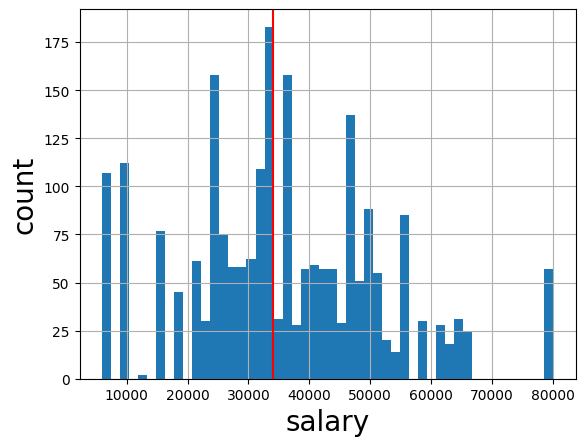

In [3]:
def count_aver_salary(salary):
    salary = salary.split('K-$')
    return (int(salary[1][:salary[1].index('K')]) - int(salary[0][1:])) * 1000

# salary histogramm
df = df[(df['Salary Estimate'] != "-1")]
df['Salary Estimate'] = df['Salary Estimate'].apply(count_aver_salary) 
median = np.median(df['Salary Estimate'])


plt.hist(df['Salary Estimate'], bins=50)
plt.axvline(median, c='r')
plt.xlabel('salary', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.grid()

Осуществим последние шаги по подготовке датасета:
- бинаризуем признак Salary Estimate по описанному ранее порогу.

In [4]:
df['Salary Estimate'] = (df['Salary Estimate'] > median).astype(int)
df.drop('Revenue', axis=1, inplace=True)
df.drop('Easy Apply', axis=1, inplace=True)
df.drop('Rating', axis=1, inplace=True)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors
0,0,"Data Analyst, Center on Immigration and Justic...",0,Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,-1
1,1,Quality Data Analyst,0,Overview\n\nProvides analytical and technical ...,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",0,We’re looking for a Senior Data Analyst who ha...,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,GoDaddy
3,3,Data Analyst,0,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,-1
4,4,Reporting Data Analyst,0,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",DraftKings


#### 1. (0 баллов) Разбейте получившуюся выборку на обучающую и контрольную в соотношении 70/30 с использованием перемешивания объектов.

При разбиении используйте значение параметра random_state=42.

In [5]:
# Your code here
from sklearn.model_selection import train_test_split

# Разделение данных
X = df.drop(columns='Salary Estimate')  # Признаки
y = df['Salary Estimate']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (1576, 12)
Размер тестовой выборки: (676, 12)


## Векторизация

Как правило, модели, используемые в машинном обучении, применяются в предположении, что матрица "объект-признак" является вещественнозначной. Поэтому при работе с категориальными признаками и текстами сперва их необходимо привести к вещественному виду.

Заметим, что в нашей задаче есть признаки, являющиеся текстами произвольной природы (Job Title, Job Description) категориальные признаки, принимающие ограниченное число значений (Headquarters, Industry и др.).

Самый простой и понятный способ преобразования текстовых данных — векторизация. В этом случае для каждого слова, встречающегося в некотором набре текстов мы создаём отдельный новый признак, который будет равен $1$, когда слово встречается в заданном объекте, и $0$ – в противном случае.

#### 2. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, осуществив векторизацию получившихся текстов при помощи [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [6]:
# Your code here
from sklearn.feature_extraction.text import CountVectorizer

# Объединяем все признаки в один текст
X_train_text = X_train.apply(lambda row: ' '.join(row.astype(str)), axis=1)
X_test_text = X_test.apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Векторизация с использованием CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

print(f"Размерность после векторизации (обучающая выборка): {X_train_vec.shape}")
print(f"Размерность после векторизации (тестовая выборка): {X_test_vec.shape}")


Размерность после векторизации (обучающая выборка): (1576, 19324)
Размерность после векторизации (тестовая выборка): (676, 19324)


#### 3. (1.5 балла) Обучите модель на обучающей выборке:
 - [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию.

In [7]:
# Your code here
from sklearn.linear_model import LogisticRegression

# Инициализируем модель
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Обучение модели
logreg.fit(X_train_vec, y_train)

# Выводим информацию об обученной модели
print("Модель обучена.")


Модель обучена.


#### 4. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для построенной в п. 3 модели на контрольной выборке.

ROC-AUC: 0.6816
F1-Score: 0.6173


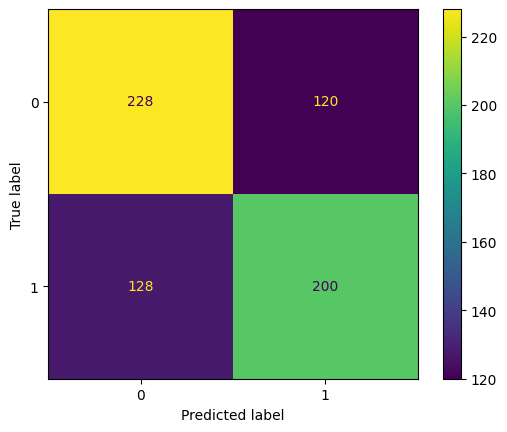

In [8]:
# Your code here
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Предсказания модели
y_pred = logreg.predict(X_test_vec)
y_pred_prob = logreg.predict_proba(X_test_vec)[:, 1]

# Вычисление метрик
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Вывод результатов
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1-Score: {f1:.4f}")

# Отображение матрицы ошибок
disp.plot()


#### 5. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 2. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретируйте полученный результат.

In [9]:
# Your code here
import numpy as np

# Извлекаем веса признаков
feature_names = vectorizer.get_feature_names_out()
weights = logreg.coef_[0]

# Сортируем по величине веса
sorted_indices = np.argsort(weights)
top_positive = sorted_indices[-10:]  # Топ-10 положительных
top_negative = sorted_indices[:10]   # Топ-10 отрицательных

print("Наибольшее положительное влияние:")
for idx in top_positive:
    print(f"{feature_names[idx]}: {weights[idx]:.4f}")

print("\nНаибольшее отрицательное влияние:")
for idx in top_negative:
    print(f"{feature_names[idx]}: {weights[idx]:.4f}")


Наибольшее положительное влияние:
what: 0.5610
would: 0.5615
ca: 0.5650
nj: 0.5712
levels: 0.6089
phoenix: 0.7431
san: 0.7635
diego: 0.8997
az: 0.9360
jose: 0.9914

Наибольшее отрицательное влияние:
antonio: -1.1133
chicago: -1.0801
il: -1.0767
oh: -0.8008
fl: -0.7184
glendale: -0.6214
va: -0.5548
bank: -0.5370
other: -0.5340
combination: -0.5230


## TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.

2. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

#### 6. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, вычислив вектор tf-idf для каждого объекта помощи [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [10]:
# Your code here
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание текстового описания
X_train_text = X_train.apply(lambda row: ' '.join(row.astype(str)), axis=1)
X_test_text = X_test.apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Векторизация с использованием TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print(f"Размерность после TF-IDF векторизации (обучающая выборка): {X_train_tfidf.shape}")
print(f"Размерность после TF-IDF векторизации (тестовая выборка): {X_test_tfidf.shape}")


Размерность после TF-IDF векторизации (обучающая выборка): (1576, 19324)
Размерность после TF-IDF векторизации (тестовая выборка): (676, 19324)


#### 7. (0 баллов) Обучите следующую модель на обучающей выборке:
- [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию.

In [11]:
# Your code here
# Инициализируем модель логистической регрессии
logreg_tfidf = LogisticRegression(random_state=42, max_iter=1000)

# Обучение модели
logreg_tfidf.fit(X_train_tfidf, y_train)

# Вывод информации об обученной модели
print("Модель обучена на TF-IDF признаках.")


Модель обучена на TF-IDF признаках.


#### 8. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для построенной в п. 7 модели на контрольной выборке.

ROC-AUC: 0.7090
F1-Score: 0.6476


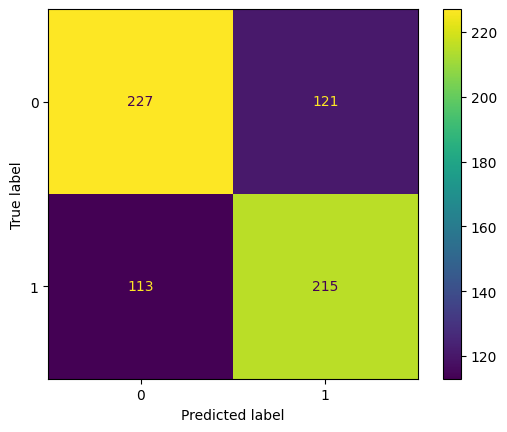

In [12]:
# Your code here
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Предсказания модели
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)
y_pred_prob_tfidf = logreg_tfidf.predict_proba(X_test_tfidf)[:, 1]

# Вычисление метрик
roc_auc_tfidf = roc_auc_score(y_test, y_pred_prob_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

# Построение матрицы ошибок
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=logreg_tfidf.classes_)

# Вывод результатов
print(f"ROC-AUC: {roc_auc_tfidf:.4f}")
print(f"F1-Score: {f1_tfidf:.4f}")

# Отображение матрицы ошибок
disp_tfidf.plot()


#### 9. (0.5 балла) Сравните значения метрик из п. 8 со значениями, полученными в п. 5, и сравните соответствующие модели по качеству из работы.

**Ответ**:

Модель с TF-IDF демонстрирует более высокую эффективность как в терминах ROC-AUC, так и F1-меры. Этот метод векторизации позволяет учесть более тонкие различия в тексте, делая модель более точной и надежной для данной задачи. Рекомендуется использовать TF-IDF для этой задачи классификации.

#### 10. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 7. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [13]:
# Your code here
import numpy as np

# Извлекаем веса признаков
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_weights = logreg_tfidf.coef_[0]

# Сортируем веса
sorted_indices_tfidf = np.argsort(tfidf_weights)
top_positive_tfidf = sorted_indices_tfidf[-10:]  # Топ-10 положительных
top_negative_tfidf = sorted_indices_tfidf[:10]   # Топ-10 отрицательных

# Вывод признаков с наибольшим/наименьшим влиянием
print("Признаки с наибольшим положительным влиянием на целевую переменную:")
for idx in reversed(top_positive_tfidf):
    print(f"{tfidf_feature_names[idx]}: {tfidf_weights[idx]:.4f}")

print("\nПризнаки с наибольшим отрицательным влиянием на целевую переменную:")
for idx in top_negative_tfidf:
    print(f"{tfidf_feature_names[idx]}: {tfidf_weights[idx]:.4f}")


Признаки с наибольшим положительным влиянием на целевую переменную:
ca: 1.8876
az: 1.6328
san: 1.5899
diego: 1.3305
jose: 1.2246
phoenix: 1.2112
francisco: 1.0729
teams: 1.0112
charlotte: 0.9400
maintenance: 0.8017

Признаки с наибольшим отрицательным влиянием на целевую переменную:
chicago: -2.4955
il: -2.2888
antonio: -1.3805
bank: -1.0172
oh: -0.8945
houston: -0.8254
sas: -0.7713
ut: -0.7410
analytics: -0.7297
preferred: -0.7270


## Счётчики

Ранее в рамках данного задания при построении моделей мы объединяли значения всех признаков в единую строку, что предполагает равноправность всех признаков. Однако заметим, что в этом случае мы допускаем потерю информации: слово "New York" может по-разному влиять на зарплату, если оно находится в названии объявления и в геолокации. Чтобы устранить этот недостаток, при создании текстового описания объекта будем объединять только значения признаков Job Title и Job Description, а остальные будем рассматривать как категориальные. При этом с полученным текстовым описанием объекта будем работать, как раньше (при помощи векторизации или tf-idf), а для кодирования категориальных признаков используем **счётчики**.

Идея этого метода состоит в том, чтобы заменить значение категориального признака на вероятность того, что объект с данным значением признака относится к положительному классу. Опишем эту идею более формально. Пусть у нас есть выборка $X = \{ (x_i, y_i) \}_{i=1}^l,$ и $j$-ый признак принимает значения из множества $U_j = \{ u_{jn}\}_{n=1}^{N_j},$ где $N_j$ — количество различных значений $j$-ого признака. Пусть $x_{ij} = u_{jn},$ тогда заменим значения $j$-ого категориального признака объекта $x_i$ на следующую оценку: 
$$\hat{P}(y_i=+1|x_{ij}=u_{jn}) = \frac{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right]}.$$

Однако заметим, что при таком способе формирования счётчиков мы учитываем в формуле для объекта $x_i$ его метку $y_i$, тем самым вносим информацию об ответе в признаки. Чтобы устранить этот недостаток, при вычислении счётчика будем исключать из рассмотрения текущий объект, т.е. рассматривать следующую оценку:
$$\hat{P}(y_i=+1|X_{ij}=u_{jn}) = \frac{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right]},$$

#### 11. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения признаков Job Title и Job Description каждого объекта выборки через символ пробела, после чего перейдите к признаковому описанию объектов, вычислив вектор tf-idf аналогично п. 6.

In [14]:
# Your code here
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание текстового описания
X_train_text_new = X_train[['Job Title', 'Job Description']].apply(lambda row: ' '.join(row.astype(str)), axis=1)
X_test_text_new = X_test[['Job Title', 'Job Description']].apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Векторизация с использованием TF-IDF
tfidf_vectorizer_new = TfidfVectorizer()
X_train_tfidf_new = tfidf_vectorizer_new.fit_transform(X_train_text_new)
X_test_tfidf_new = tfidf_vectorizer_new.transform(X_test_text_new)

print(f"Размерность после TF-IDF векторизации (обучающая выборка): {X_train_tfidf_new.shape}")
print(f"Размерность после TF-IDF векторизации (тестовая выборка): {X_test_tfidf_new.shape}")



Размерность после TF-IDF векторизации (обучающая выборка): (1576, 17302)
Размерность после TF-IDF векторизации (тестовая выборка): (676, 17302)


#### 12. (1 балл) Закодируйте категориальные признаки (все, кроме Job Title и Job Description) при помощи [one-hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), после чего обучите логистическую регрессию на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

ROC-AUC: 0.7782
F1-Score: 0.7111


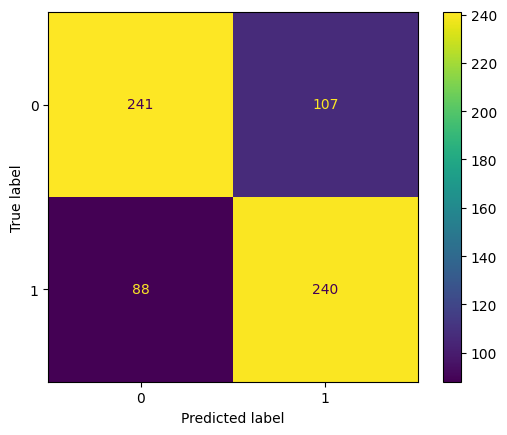

In [15]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Категориальные признаки для кодирования
categorical_features = [col for col in X_train.columns if col not in ['Job Title', 'Job Description']]

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

# Объединяем TF-IDF и категориальные признаки
X_train_combined = hstack([X_train_tfidf_new, X_train_categorical])
X_test_combined = hstack([X_test_tfidf_new, X_test_categorical])

# Логистическая регрессия
logreg_combined = LogisticRegression(random_state=42, max_iter=1000)
logreg_combined.fit(X_train_combined, y_train)

# Предсказания
y_pred_combined = logreg_combined.predict(X_test_combined)
y_pred_prob_combined = logreg_combined.predict_proba(X_test_combined)[:, 1]

# Метрики
roc_auc_combined = roc_auc_score(y_test, y_pred_prob_combined)
f1_combined = f1_score(y_test, y_pred_combined)

# Матрица ошибок
cm_combined = confusion_matrix(y_test, y_pred_combined)
disp_combined = ConfusionMatrixDisplay(confusion_matrix=cm_combined, display_labels=logreg_combined.classes_)

# Результаты
print(f"ROC-AUC: {roc_auc_combined:.4f}")
print(f"F1-Score: {f1_combined:.4f}")

# Отображение матрицы ошибок
disp_combined.plot()


#### 13. (2 балла) Для выборки, полученной в п. 11, закодируйте категориальные признаки (все, кроме Job Title и Job Description) при помощи счётчиков, после чего обучите логистическую регрессию на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

Уделите внимание оптимальности вычисления счётчиков!

ROC-AUC: 0.6648
F1-Score: 0.0000


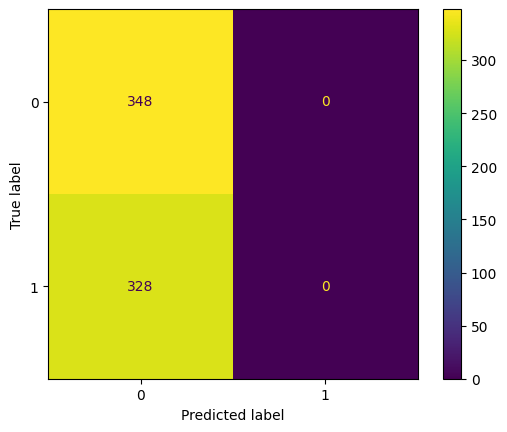

In [16]:
import numpy as np

# Функция для вычисления счётчиков
def calculate_counters(df, y, feature, smoothing=1):
    counts = df.groupby(feature)[y.name].agg(['sum', 'count'])
    probabilities = (counts['sum'] + smoothing) / (counts['count'] + 2 * smoothing)
    return probabilities

# Добавляем целевую переменную в DataFrame для вычисления счётчиков
X_train_with_target = X_train.copy()
X_train_with_target['Salary Estimate'] = y_train

# Счётчики для категориальных признаков
train_counters = {}
test_counters = {}
for feature in categorical_features:
    probabilities = calculate_counters(X_train_with_target, y_train, feature)
    train_counters[feature] = X_train[feature].map(probabilities).fillna(0)
    test_counters[feature] = X_test[feature].map(probabilities).fillna(0)

# Преобразуем данные в массивы
X_train_counter = np.hstack([X_train_tfidf_new.toarray()] + [np.array(train_counters[feature]).reshape(-1, 1) for feature in categorical_features])
X_test_counter = np.hstack([X_test_tfidf_new.toarray()] + [np.array(test_counters[feature]).reshape(-1, 1) for feature in categorical_features])

# Обучение логистической регрессии
logreg_counter = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logreg_counter.fit(X_train_counter, y_train)

# Предсказания
y_pred_counter = logreg_counter.predict(X_test_counter)
y_pred_prob_counter = logreg_counter.predict_proba(X_test_counter)[:, 1]

# Метрики
roc_auc_counter = roc_auc_score(y_test, y_pred_prob_counter)
f1_counter = f1_score(y_test, y_pred_counter)

# Матрица ошибок
cm_counter = confusion_matrix(y_test, y_pred_counter)
disp_counter = ConfusionMatrixDisplay(confusion_matrix=cm_counter, display_labels=logreg_counter.classes_)

# Результаты
print(f"ROC-AUC: {roc_auc_counter:.4f}")
print(f"F1-Score: {f1_counter:.4f}")

# Отображение матрицы ошибок
disp_counter.plot()



#### 14. (0.5 балла) Сравните значения метрик из п. 13 со значениями, полученными в п. 12, и сделайте вывод о качестве классификации для каждого из методов кодирования категориальных признаков.

**Ответ:**

## Подбор гиперпараметров

#### 15. (1.5 доп. балла) Разбейте обучающую выборку, полученную в п. 11, на обучающую и валидационную в отношении 80/20, после чего подберите оптимальное количество фолдов, используемое при кодировании категориальных признаков (всех, кроме Job Title и Job Description), путём оптимизации значения accuracy на валидационной выборке. Используйте следующую модель, аналогично также подобрав оптимальные значения указанных гиперпараметров:
- логистическую регрессию из модуля sklearn с подбором коэффициента регуляризации.

In [17]:
# Your code here

#### 16. (0.5 доп. балла) Обучите указанные выше модели на обучающей выборке для оптимальных значений гиперпараметров, найденных в п. 15, после чего для каждой из моделей вычислите значения ROC-AUC, F-меры, а также постройте матрицу ошибок на контрольной выборке. Как качество классификации при помощи полученной в данном разделе модели соотносится с моделями, полученными в предыдущих разделах?

In [18]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу вторую любимую смешную картинку.

А здесь — посоветовать преподавателям хороший фильм или сериал.